In [ ]:
# 1. Pd
# 2. datat-excel,preprocessing, visulize: 2session
# 3. ML, superviused, linear regression, NN : 4sessions
# DL:pytorch, CNN, 4sessions,

In [1]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [4]:
import os


NameError: name 'pwd' is not defined

In [5]:
pwd

'C:\\Users\\a\\Omid'

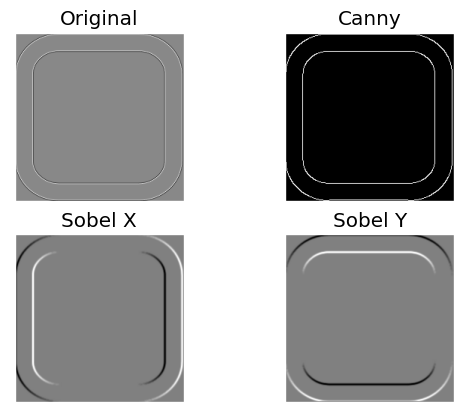

In [2]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


image = cv.imread('un_box.png', 0)
image_noise_removed = cv.GaussianBlur(image, (1,1),0)#Changing(1,1) mostly affects on Laplacian

# Laplacian
laplacian = cv.Laplacian(image_noise_removed, cv.CV_64F)

# sobelx
sobelx= cv.Sobel(image_noise_removed, cv.CV_64F, 1, 0, ksize=5)

# sobely
sobely= cv.Sobel(image_noise_removed, cv.CV_64F, 0, 1, ksize=5)


# Canny Edge Detection
canny = cv.Canny(image_noise_removed, 100, 200)


plt.subplot(2,2,1),plt.imshow(laplacian,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(canny,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

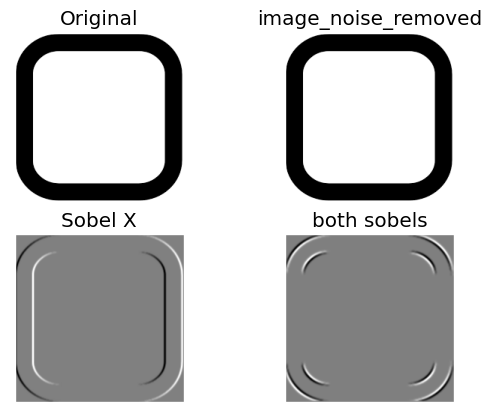

In [6]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


image = cv.imread('un_box.png', 0)
image_noise_removed = cv.GaussianBlur(image, (1,1),0)#Changing(1,1) mostly affects on Laplacian

# sobelx
sobelx= cv.Sobel(image_noise_removed, cv.CV_64F, 1, 0, ksize=5)

# sobely
res= cv.Sobel(sobelx, cv.CV_64F, 0, 1, ksize=5)

plt.subplot(2,2,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(image_noise_removed,cmap = 'gray')
plt.title('image_noise_removed'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(res,cmap = 'gray')
plt.title('both sobels'), plt.xticks([]), plt.yticks([])

plt.show()

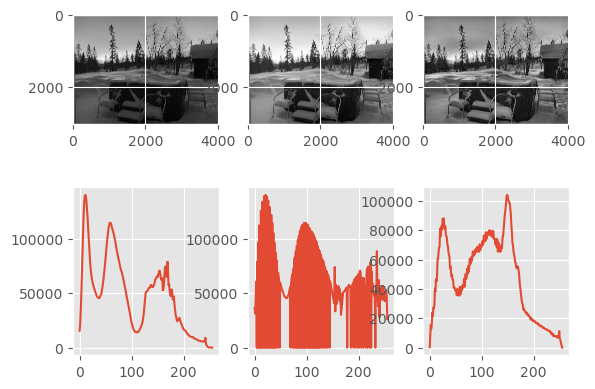

In [7]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread("snow.jpg", 0)
img_hist= cv.calcHist([image], [0],None,[256], [0,256])# cv.calcHist computes the frequency of pixel values
#equalizeHist improves the contrast of the image by spreading out the most frequent intensity values.
equalized_histogram = cv.equalizeHist(image)
img_equal_hist= cv.calcHist([equalized_histogram], [0],None,[256], [0,256])

""" CLAHE is a variant of histogram equalization that is better suited for improving local contrast and 
enhancing the definition of edges in each region of an image. It is particularly useful for images
with varying lighting conditions.
The parameters clipLimit and tileGridSize control the contrast limit and the size of the regions to consider, respectively. """
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)
cl_equal_hist= cv.calcHist([cl1], [0],None,[256], [0,256])


plt.subplot(231), plt.imshow(image, 'gray')
plt.subplot(234), plt.plot(img_hist)
plt.subplot(232), plt.imshow(equalized_histogram, 'gray')
plt.subplot(235), plt.plot(img_equal_hist)
plt.subplot(233), plt.imshow(cl1, 'gray')
plt.subplot(236), plt.plot(cl_equal_hist)
plt.show()

The important thing to note is that after histogram equalization, the histogram tends to have a more uniform distribution of intensities

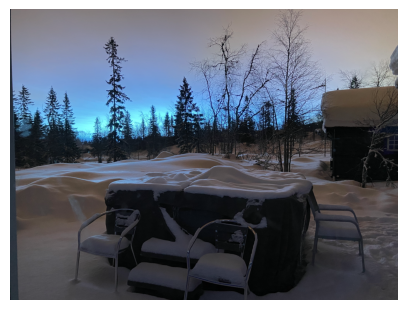

In [5]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread("snow.jpg")

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(image)
ax.axis('off')# To not show squared axis in pic
plt.show()


The provided code snippet is a loop that calculates and plots the histograms for each color channel of a color image using OpenCV and Matplotlib in Python.
histogram=cv.calcHist([image], [i],None,[256], [0,256]): Inside the loop, this line calculates the histogram of the i-th channel of the image. The calcHist function is called with parameters that tell it to calculate the histogram for the current channel [i], with no mask (None), with 256 bins ([256]), and a range of [0,256]. This will compute the frequency of pixel values in the specified channel.

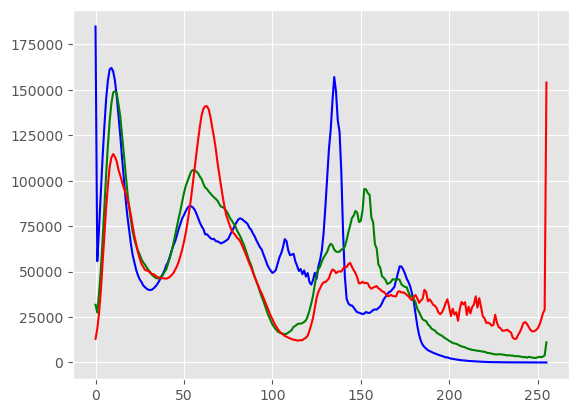

In [6]:


colors=['b','g','r']
for i,col in enumerate(colors):
    histogram=cv.calcHist([image], [i],None,[256], [0,256])
    plt.plot(histogram,color=col)

plt.show()

pandas


In [10]:
 # Sample dataframe df
df = pd.DataFrame({'num_legs': [2, 4, np.nan, 0],
'num_wings': [2, 0, 0, 0],
'num_specimen_seen': [10, np.nan, 1, 8]},
index=['falcon', 'dog', 'spider', 'fish'])
df # Display dataframe df

,num_legs,num_wings,num_specimen_seen
falcon,2.0,2,10.0
dog,4.0,0,NaN
spider,NaN,0,1.0
fish,0.0,0,8.0


In [8]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
           columns=['a', 'b', 'c'],index=['s1','s2','s3'])
df2

,a,b,c
s1,1,2,3
s2,4,5,6
s3,7,8,9


In [12]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
print(df.head())
df.head(2) # View top data
df.tail(2) # View bottom data
print(df.index) # Display index column
print(df.dtypes) # Inspect datatypes
df.describe() # Display quick statistics summary of data

        num_legs  num_wings  num_specimen_seen
falcon       2.0          2               10.0
dog          4.0          0                NaN
spider       NaN          0                1.0
fish         0.0          0                8.0
Index(['falcon', 'dog', 'spider', 'fish'], dtype='object')
num_legs             float64
num_wings              int64
num_specimen_seen    float64
dtype: object


,num_legs,num_wings,num_specimen_seen
count,3.0,4.0,3.000000
mean,2.0,0.5,6.333333
std,2.0,1.0,4.725816
min,0.0,0.0,1.000000
25%,1.0,0.0,4.500000
50%,2.0,0.0,8.000000
75%,3.0,0.5,9.000000
max,4.0,2.0,10.000000


### 1.13.2 Subsetting, slicing, and indexing

In [21]:
 # Another sample dataframe df1 - using NumPy array with datetime index and␣!labeled column
df1 = pd.date_range('20130101', periods=6)
df1 = pd.DataFrame(np.random.randn(6, 4), index=df1, columns=list('ABCD'))
df1 # Display dataframe df1

,A,B,C,D
2013-01-01,0.894824,0.020838,-0.216308,-0.870391
2013-01-02,2.023276,1.799026,-0.441122,1.175336
2013-01-03,0.579573,-0.141500,0.461509,-0.249917
2013-01-04,-0.322756,0.688513,-0.535477,-0.596540
2013-01-05,0.114981,1.456410,-0.385868,-1.051571
2013-01-06,-0.039020,-0.134762,0.517782,-0.102540


In [22]:
print(df1)
df1.T # Transpose data
df1.sort_values(by='B') # Sort by values
df1['A'] # Select column A
df1[0:3] # Select index 0 to 2
df1['20130102':'20130104'] # Select from index matching the values
df1.loc[:, ['A', 'B']] # Select on a multi-axis by label
df1.iloc[3] # Select via the position of the passed integers
df1[df1 > 0] # Select values from a DataFrame where a boolean condition is met
df2 = df1.copy() # Copy the df1 dataset to df2
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three'] # Add column E with value
df2[df2['E'].isin(['two', 'four'])] # Use isin method for filtering

                   A         B         C         D
2013-01-01  0.894824  0.020838 -0.216308 -0.870391
2013-01-02  2.023276  1.799026 -0.441122  1.175336
2013-01-03  0.579573 -0.141500  0.461509 -0.249917
2013-01-04 -0.322756  0.688513 -0.535477 -0.596540
2013-01-05  0.114981  1.456410 -0.385868 -1.051571
2013-01-06 -0.039020 -0.134762  0.517782 -0.102540


,A,B,C,D,E
2013-01-03,0.579573,-0.14150,0.461509,-0.249917,two
2013-01-05,0.114981,1.45641,-0.385868,-1.051571,four


### 1.13.3 Missing data
Pandas primarily uses the value np.nan to represent missing data. It is not included in computations
by default.

In [26]:
df = pd.DataFrame({'num_legs': [2, 4, np.nan, 0],
'num_wings': [2, 0, 0, 0],
'num_specimen_seen': [10, np.nan, 1, 8]},
index=['falcon', 'dog', 'spider', 'fish'])
print(df)
print(df.dropna(how='any')) # Drop any rows that have missing data
print(df.dropna(how='any', axis=1)) #default axis is 0
df.dropna(how='any', axis=1) # Drop any columns that have missing data
print(df.fillna(value=5)) # Fill missing data with value 5

pd.isna(df) # To get boolean mask where data is missing

        num_legs  num_wings  num_specimen_seen
falcon       2.0          2               10.0
dog          4.0          0                NaN
spider       NaN          0                1.0
fish         0.0          0                8.0
        num_legs  num_wings  num_specimen_seen
falcon       2.0          2               10.0
fish         0.0          0                8.0
        num_wings
falcon          2
dog             0
spider          0
fish            0
        num_legs  num_wings  num_specimen_seen
falcon       2.0          2               10.0
dog          4.0          0                5.0
spider       5.0          0                1.0
fish         0.0          0                8.0


,num_legs,num_wings,num_specimen_seen
falcon,False,False,False
dog,False,False,True
spider,True,False,False
fish,False,False,False


#### File handling by Pandas

In [27]:
df.to_csv('foo.csv') # Write to CSV file in default address or you can set address and change back to forward slash

In [28]:
newdf=pd.DataFrame({'name':['bardia','ario','mandana'],'age':[20,19,16]},['num1','num2','num3'])
newdf.to_csv('foo.csv')

In [29]:
pd.read_csv('foo.csv') # Read from CSV file
df.to_excel('foo.xlsx', sheet_name='Sheet1') # Write to Microsoft Excel file

In [30]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'],engine='openpyxl') # Read from Microsoft Excel file

,Unnamed: 0,num_legs,num_wings,num_specimen_seen
0,falcon,2.0,2,10.0
1,dog,4.0,0,NaN
2,spider,NaN,0,1.0
3,fish,0.0,0,8.0


In [18]:
import os
import pandas as pd
os.getcwd()
os.chdir('C:\\Users\\omidl\\OneDrive\\Desktop\\test PY')
print(os.getcwd())
pd.read_csv('grades.csv',header=None)
#os.chdir('C:\\Users\\omidl\\my trainings')

C:\Users\omidl\OneDrive\Desktop\test PY


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,name,les1,les2,les3,les4,les5,les6,les7,les8,les9,les10,les11,les12,les13,les14,les15,les16
1,mandana,5,7,3,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hamid,3,9,4,20,9,1,8,16,0,5,2,4,7,2,1,NaN
3,sina,19,10,19,6,8,14,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sara,0,5,20,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,soheila,13,2,5,1,3,10,12,4,13,17,7,7,NaN,NaN,NaN,NaN
6,ali,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,sarvin,0,16,16,13,19,2,17,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
os.getcwd()
os.chdir('C:\\Users\\omidl\\my trainings')
df=pd.read_csv('vgsales.csv')
print(df.shape)
df

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [30]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [32]:
X=df.drop(columns=['Rank','Name','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Genre','Publisher'])#Drop specified labels from rows or columns.
print(X)
y=df['Rank']
y

         Year
0      2006.0
1      1985.0
2      2008.0
3      2009.0
4      1996.0
...       ...
16593  2002.0
16594  2003.0
16595  2008.0
16596  2010.0
16597  2003.0

[16598 rows x 1 columns]


0            1
1            2
2            3
3            4
4            5
         ...  
16593    16596
16594    16597
16595    16598
16596    16599
16597    16600
Name: Rank, Length: 16598, dtype: int64

In [33]:
y

0            1
1            2
2            3
3            4
4            5
         ...  
16593    16596
16594    16597
16595    16598
16596    16599
16597    16600
Name: Rank, Length: 16598, dtype: int64

In [68]:
concrete = pd.read_csv('M:/GLI/students/proj/Toronto student Omran/assigment3/Data visualization/concrete_strength.csv')
concrete = concrete.rename(columns={'csMPa': 'UCS'})
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,UCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [69]:
concrete[['UCS', 'age']].head(5)

,UCS,age
0,79.99,28
1,61.89,28
2,40.27,270
3,41.05,365
4,44.30,360


In [70]:
concrete['UCS'][0:100]

0     79.99
1     61.89
2     40.27
3     41.05
4     44.30
      ...  
95    49.20
96    46.80
97    45.70
98    55.60
99    54.90
Name: UCS, Length: 100, dtype: float64

In [71]:
one=concrete['UCS']
print(type(one))
two=concrete[['UCS']]
print(type(two))
three=concrete['UCS'].values
print(type(three))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
